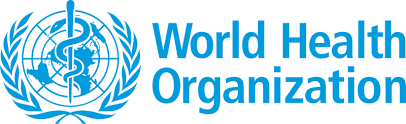

# **Train Test Splitting**

We have analysed the data, and now we will build a model to predict the life expectancy using the train test splitting method.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools

In [ ]:
# Reading in the data
df = pd.read_csv("Life Expectancy Data.csv")

In [ ]:
df.head();

Now we created our feature columns from the data frame, by removing Life expectancy, which is the target column for this dataset.

In [ ]:
feature_cols = df.columns
feature_cols = list(feature_cols)
feature_cols.remove("Life_expectancy")

It's important here that we add a constant. Including a constant makes the interpretation of regression coefficients more meaningful. Without a constant, the coefficients of the other variables would represent changes relative to the origin, which can be less intuitive and harder to interpret.

Reference: https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/

In [ ]:
X = df[feature_cols]
X = sm.add_constant(X)
y = df["Life_expectancy"]

In [ ]:
X.head();

We determined the proportion of the dataset that will be allocated to the testing set. In this case, test_size = 0.2 indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling Life Expectancy on WHO data**

We have analysed the data, and now we will build a model to predict the life expectancy using the train test method.

We tackled feature engineering, at this point not all of our columns were numerical. We decided to drop the column "Country" because it was not an numerical data and  had no/minimal correlation. There's 179 countries, if we attempted one hot encoding, this will cause noise in the data. Removing "Country" removes the bias in the data also.

In [ ]:
def feature_engineering(df):
  df = df.copy()
  df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region')
  df.drop("Country",axis=1,inplace=True)
  return df

In [ ]:
X_train_fe = feature_engineering(X_train)

In [ ]:
X_train_fe.head();

In [ ]:
y_train.head();

These are the featured columns that are used on the training set.

In [ ]:
X_train_fe.columns

Index(['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America'],
      dtype='object')

In [ ]:
X_train_fe;

## **VIF use:**

In [ ]:
# Using ViF to find columns with strong multicollinearity to remove them from the model

from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

cols = ['Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing']

pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)

## CODE FROM ALEX

Year                                1.077053
Infant_deaths                      46.391053
Under_five_deaths                  47.015582
Adult_mortality                     8.075862
Alcohol_consumption                 2.421188
Hepatitis_B                         2.622288
Measles                             1.586372
BMI                                 2.803264
Polio                              12.431674
Diphtheria                         13.501654
Incidents_HIV                       2.929898
GDP_per_capita                      2.423938
Population_mln                      1.135601
Thinness_ten_nineteen_years         8.650180
Thinness_five_nine_years            8.646712
Schooling                           4.491876
Economy_status_Developed        41371.077675
Economy_status_Developing      158671.488298
dtype: float64

Here we can see that Infant deaths and Under five deaths have high multicollinarity however once removed they make more model less robust so we kept them in.

## **Comprehensive Model**

We initially dropped the columns with a P value higher than 0.05. We removed the some of the diseases that were highly correlated with each other. Some of them were kept in the code because it effected the Root Mean Squared Error (RMSE) values. We removed some of the columns that had a high correlation with the life expectancy. Columns we removed are:

*   Year
*   Alcohol consumption
*   BMI
*   Polio
*   Diphtheria
*   HIV Incidents
*   Population
*   Thinness 10-19 years
*   Thinness 5-9 years
*   Schooling
*   Economy status developed
*   Economy status developing
*   Region Asia
*   Region Oceania
*   Region Middle East



In [ ]:
feature_cols = ['const', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Hepatitis_B',
       'BMI', 'GDP_per_capita',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_North America',
       'Region_Rest of Europe', 'Region_South America']

In [ ]:
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols]) # Initialising the model object
results = lin_reg.fit() # Creating an object for the fitted model

df['y_pred'] = results.predict(X_train_fe[feature_cols])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:37:10   Log-Likelihood:                -3864.4
No. Observations:                2291   AIC:                             7753.
Df Residuals:                    2279   BIC:                             7822.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   84.1045      0.497    169.059      0.000      83.129      85.080
Infant_deaths                           -0.0695      0.007    -10.486      0.000      -0.083      -0.057
Under_five_deaths                       -0.0490      0.004    -12.206      0.000      -0.057      -0.041
Adult_mortality                         -0.0444      0.000   -106.409      0.000      -0.045      -0.044
Hepatitis_B                             -0.0059      0.002     -2.881      0.004      -0.010      -0.002
BMI                                     -0.1250      0.017     -7.278      0.000      -0.159      -0.091
GDP_per_capita                        4.567e-05    2.1e-06     21.704      0.000    4.15e-05    4.98e-05
Region_Central America and Caribbean     1.7790      0.100     17.817      0.000       1.583       1.975
Region_European Union                    1.3544      0.099     13.743      0.000       1.161       1.548
Region_North America                     1.8501      0.220      8.412      0.000       1.419       2.281
Region_Rest of Europe                    0.6751      0.110      6.153      0.000       0.460       0.890
Region_South America                     1.5910      0.114     13.902      0.000       1.367       1.815
==============================================================================
Omnibus:                       24.649   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.157
Skew:                           0.182   Prob(JB):                     4.66e-07
Kurtosis:                       3.415   Cond. No.                     3.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The condition number here is quite high which shows there is a strong correlation between the independant variables.

We tested the model on the training data first to calculate the Root Mean Squared Error (RMSE).


In [ ]:
y_pred = results.predict(X_train_fe[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

1.3071096117697312


In [ ]:
X_test_fe = feature_engineering(X_test)
X_test_fe = X_test_fe[feature_cols]

We tested the model on the testing data to calculate the Root Mean Squared Error (RMSE). This shows how well the data fits in comparison to the training data. Our model shows that our data is slightly underfitted by 0.02.

In [ ]:
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.3301071810389917


Here, we double check the coefficients in the summary table againt this code to be sure we read the data accurately.

In [ ]:
coefficients = results.params[0:12]
coefficients

const                                   84.104471
Infant_deaths                           -0.069534
Under_five_deaths                       -0.048954
Adult_mortality                         -0.044366
Hepatitis_B                             -0.005921
BMI                                     -0.124955
GDP_per_capita                           0.000046
Region_Central America and Caribbean     1.779009
Region_European Union                    1.354424
Region_North America                     1.850054
Region_Rest of Europe                    0.675123
Region_South America                     1.590958
dtype: float64

For our comprehensive model:
*   RMSE: 1.33
*   R squared: 0.981



## **Minimalistic Model**

We built a second model which is more minimalistic and does not contain any sensitive data. The steps were were repeated to build the function.



* When creating our minimalistic model we decided to immediately remove the columns we though to be the most ‘sensitive’

* in our initial assessment we focused on medical sensitivity immediately removing columns such as ‘Infant_deaths’ , ‘Under_five_deaths’  and the thinness columns
    *  we immediately though that medical data relating to children would be the most sensitive so removed this from our model completely


* Next we removed the other medical related data for example   ‘Measles’ , ’Polio’

    * In terms of vaccination data, these values could be related to the varying vaccine availability across different countries and regions.
    * Using such data to model the life expectancy could bring the ‘ unwanted financial implications ‘ mentioned  that we are avoiding in this simplified model


* Another note we made was that although it may not seem sensitive the alcohol consumption statistic could be seen as sensitive in some religions or for cultural reasons (so we also removed that)


* From here we tried a variety of models to find the best combination of columns for our minimalistic model within our requirements
    * These are : Adult mortality, schooling, economy status developing

    * We considered the adult mortality to be vital to our models success - although sensitive data it was a better column to use than for example the infant deaths or other child- related data that we considered more sensitive

    * It was also the column that showed the highest correlation with life expectancy

    * We noted that the gdp could be considered sensitive information but trialed our models using it as we initially found that it had a strong correlation with the life expectancy in our analysis

    * However interestingly we found that this did not benefit the final model enough to justify using this data

In [ ]:
feature_cols = ['const', 'Adult_mortality', 'Schooling', 'Economy_status_Developing']

In [ ]:
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols]) # Initialising the model object
results = lin_reg.fit() # Creating an object for the fitted model

df['y_pred'] = results.predict(X_train_fe[feature_cols])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.340e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:37:10   Log-Likelihood:                -5055.7
No. Observations:                2291   AIC:                         1.012e+04
Df Residuals:                    2287   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        75.8524      0.274    276.531      0.000      75.314      76.390
Adult_mortality              -0.0637      0.000   -128.641      0.000      -0.065      -0.063
Schooling                     0.7685      0.020     38.032      0.000       0.729       0.808
Economy_status_Developing    -0.8031      0.143     -5.612      0.000      -1.084      -0.522
==============================================================================
Omnibus:                       84.591   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.021
Skew:                          -0.298   Prob(JB):                     7.20e-33
Kurtosis:                       4.094   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = results.predict(X_train_fe[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

2.1985709232733086


In [ ]:
X_test_fe = feature_engineering(X_test)
X_test_fe = X_test_fe[feature_cols]

In [ ]:
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

2.2260406587666814


In [ ]:
coefficients_min = results.params[0:12]
coefficients_min

const                        75.852394
Adult_mortality              -0.063719
Schooling                     0.768486
Economy_status_Developing    -0.803093
dtype: float64

The RMSE is higher than the comprehensive model's RMSE because it has less featured columns and therefore less data, but will still give an approximate life expectancy value without using sensitive and confidential data.

For our minimalistic model:
*   RMSE: 2.22
*   R squared: 0.946